# A Fundamental Example of Machine Learning
*by James Medaugh*

## Overview
The goal of this notebook is to demonstrate one of the most elementary possible examples of a machine learning implementation. In the interest of simplicity, the model will use linear regression to estimate one output variable based upon the value of one numeric input variable.  I will use a few well known libraries such as matplotlib for graphing, pandas for reading csv data, and few others, but the focus of this notebook should be the mathematics and visual representations.

## Scenario
The data we will use for this is a simple and silly example.  The only input variable, also called a feature, will be "number of explosions".  The output variable will be "James' rating of the film" with values ranging from 0 to 10.  The dataset contains records 50 fictious films.  It is also worth mentioning that the movie rating precision is egregiously specific (e.g. 6.025596752 movie rating out of 10).  Pretend for the sake of the example that I actually care to be that precise about how much I like a movie.

   **Independent Variable (X)** - # of explosions in a film
   
   **Dependent Variable (Y)** - James' rating of film
   
   **Model** - Linear Regression
   
   **Optimization Method** - Batch Gradient Descent
   

## Steps

First thing we need to do is get the data out of the CSV and into a python object.  Here I'm using Pandas to read the CSV file and sorting the data once it is read so it is easier to plot

In [346]:
import pandas as pd

data = pd.read_csv('movie_ratings.csv')
data = data.sort_values(by=['num_explosions'])

Next, we are going to use matplotlib to create a scatter plot.  We are graphing our X variable, number of explosions, against our Y variable James' movie rating.  I also added some axis scaling and labels.  Let's see if any patterns emerge...

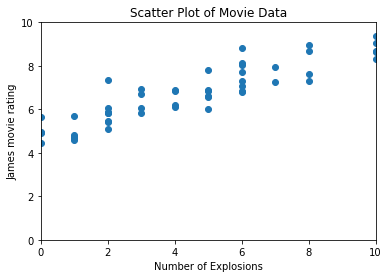

In [347]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')
plt.show()

We can see there is a pretty obvious linear relationship here.  Our next goal is to draw a line that best matches the trend displayed on the graph.  This line has many names: regression line, line of best fit, trendline and perhaps others.  But while the line may have many names, it only has one universal equation:

$$y = mx + b$$

This becomes our model.  Our X variable of number of explosions times some value m plus some value b will let us estimate the movie rating.  But how do we find the correct values for m and b?  There are an infinte combination of values for m and b together that define an infinite number.  Enter the cost function.
    

## Cost Function - Scoring Your Model

When determining the regression line purely from a visual standpoint, it becomes clear that not all lines are created equal...

For example this line (m=.7, b= 3) is fairly close to most of the data points


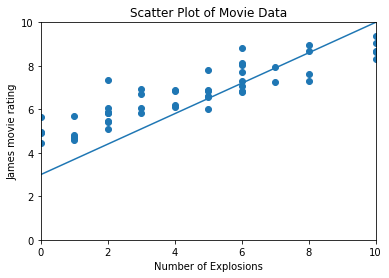

In [348]:
%matplotlib inline
import numpy as np

#Defines the trend line
m = .7
b = 3
linex = np.arange(0,11)        #list of number 0 to 10
liney = m*linex+b              #line equation

#Scatter Plot and Formatting
plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')

#Adds trend line
plt.plot(linex,liney)
plt.show()

But this line (m= 10, b= -20) is no where close to matching all of the data points

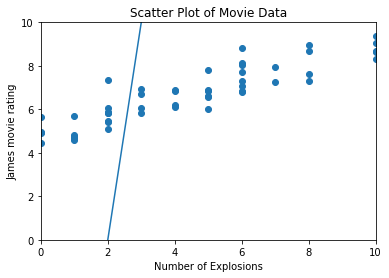

In [349]:
%matplotlib inline
import numpy as np

#Defines the trend line
m = 10
b = -20
linex = np.arange(0,11)        #list of number 0 to 10
liney = m*linex+b              #line equation

#Scatter Plot and Formatting
plt.scatter(data['num_explosions'],data['james_movie_rating'])
plt.axis([0, 10, 0, 10])
plt.xlabel('Number of Explosions')
plt.ylabel('James'' movie rating' )
plt.title('Scatter Plot of Movie Data')

#Adds trend line
plt.plot(linex,liney)
plt.show()

We know intuitively that the first example is a relatively good fit and the second example is a relatively bad fit.  However we need a way to empirically measure just how close or far the line is to the data points to quantify just how good or bad of a fit a line is.  We need a **cost function** that will inform us how close (or far-off) our model's estimates are.  For linear regression, this is accomplished by calculating the mean squared error.  The equation to calculate mean squared error is
$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

It looks intimidating at first, but if you unpack the expression into a plain english set of steps it is pretty easy and intuitive.
    
1. For each data point, find the difference between the actual value ($Y_i$) and the estimated value ($\hat{Y}_i$)
2. Square the difference of each to get rid of negative values (so they don't cancel out positive values)
3. Add all of these square together and divide by the number of data points.

Lets run through these calculation steps with a few data points from our explosions/movie rating data set.  We'll do one table for the "good line" (m= .7, b= 3) and one table for the "bad line" (m= 10, b= -20).  Note that we are getting our estimated Y value by simply plugging in our x, m and b values into the line equation $ y = mx + b $

#### Squared Errors for the "Good" Line

| X value | X in model eq. | Est. Y value | Actual Y value | Squared Error |
|---------|----------------|--------------|----------------|---------------|
|    5    | Y = .7 * 5 + 3 |      6.5     |     6.0256     |     0.225     |
|   10    | Y = .7 * 10 + 3|      10      |     8.6804     |     1.741     |
|    0    | Y = .7 * 0 + 3 |      3       |     4.9270     |     3.713     |
| ......  | ......         | do this      | 47 more times  | ......        |
| Total   |      .         |    .         |  .             |        73.2426|       

We still need to divide the total sum of squared error (73.2426) by the number of data points, which is 50.  This gives us a MSE value of roughly 1.465.  Now lets look at the bad line

#### Squared Errors for the "Bad" Line

| X value | X in model eq.  | Est. Y value | Actual Y value | Squared Error |
|---------|---------------- |--------------|----------------|---------------|
|    5    | Y = 10 * 5 - 20 |      30      |     6.0256     |     574.77    |
|   10    | Y = 10 * 10 - 20|      80      |     8.6804     |     5086.48   |
|    0    | Y = 10 * 0 - 20 |      -20     |     4.9270     |     621.36    |
| ......  | ......          | do this      | 47 more times  | ......        |
| Total   |      .          |    .         |  .             |       56007.79|

Dividing this total by our 50 data points, we get a MSE value of 1120.16.  Comparing this to the good line's MSE of 1.465, we can see that the bad line is a much worse match of the data and therefore does a much poorer job of predicting the movie rating.

Before moving on to the next section, let us write a quick python function that will calculate the MSE/cost for any combination of m and b for our data

In [350]:
def cost(data, m, b):
    #Initialize Mean Squared Error at zero
    MSE = 0
    
    #Loop through all 50 movie records
    for index, movie in data.iterrows():
        #Find difference between actual and estimate
        x = movie['num_explosions']
        estimate = m*x + b
        actual = movie['james_movie_rating']
        squared_error = (actual - estimate)**2 # <-- double asterix means exponent

        #Add to MSE total
        MSE += squared_error
        
    #Divide the final total by number of movies/datapoints
    MSE = MSE/(len(data))
    return MSE

#Check the function against our good and bad lines
print(cost(data, .7, 3)) #should be about 1.465
print(cost(data, 10, -20)) #should be about 1120.16

1.4648511114896996
1120.1557535446818


We already know our cost function is mean squared error.  Now we know that a good line has a relatively low mean squared error and that a bad line has a relatively high mean squared error.  We can extend this concept to assert that the best trend line (and therefore, best prediction model for this scenario) will have the lowest possible mean squared error.  So now it is just a matter of finding the m and b values that minimize the mean squared error for this particular data set.

## Graphing Cost Function

A key concept in machine learning is parameter optimization.  Like most things in machine learning, the name is far more daunting than the reality.  In machine learning a parameter is most often just a weight multipied by one of the input variables.  In our linear regression model we have two parameters: m and b.  Our parameter m is multiplied by our input variable, number of explosions, and our b parameter is essentially multiplied by 1 and serves as our bias term (for situations where we have X = 0 but still need to esimate a Y value)  So when we say we need to "optimize our parameters", what we really mean is "find the values of m and b that give us our best fit line".  Not so scary after all.  

The matplotlib code to make a 3d graph of the cost function on the other hand is a tad spooky...

<IPython.core.display.Javascript object>


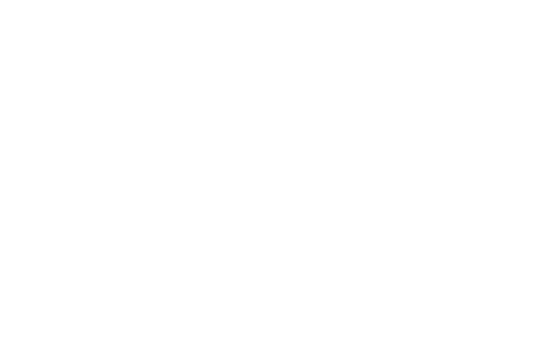

(<Figure size 432x288 with 1 Axes>,)

<IPython.core.display.Javascript object>


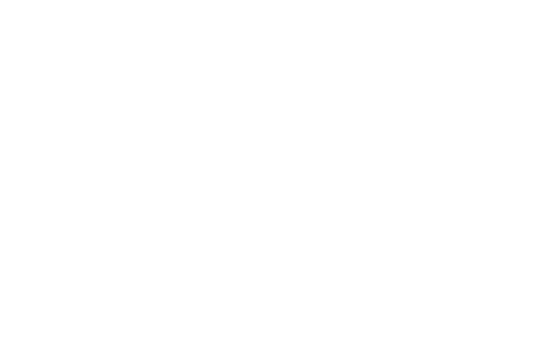

In [351]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, animation
import numpy as np

#Setup Graph
m = np.arange(-4, 4, 0.25)
b = np.arange(-20, 21, 0.25)
M, B = np.meshgrid(m, b)
Z = cost(data, M, B)
fig = pp.figure()
ax = Axes3D(fig)
ax.axis([-10,10,-50,50])
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Cost Function for m, b')


#Setup Cost Function Surface
def init():
    ax.plot_surface(M, B, Z, cmap = cm.coolwarm, 
                      linewidth=0, antialiased=False)
    return fig,

init()


If your notebook viewer does not allow for interactivity, I've also included a mp4 rotation animation so you can get a feel for the shape of the cost function.  The code to generate the mp4 is included below.

In [352]:
def animate(i):
    ax.view_init(elev=10, azim=i*4)

ani = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=90, interval=50, blit=True)

file = 'rotate_cost_function'
pp.rcParams['animation.ffmpeg_path'] = 'path/to/ffmpeg.exe'
#ani.save(file+'.mp4',writer='ffmpeg',fps=1000/50) <-- commented out so we don't overwrite the mp4 everytime this notebook runs

In [353]:
%%HTML
<video width="800" height="450" controls>
  <source src="./rotate_cost_function.mp4" type="video/mp4">
</video>

As we can see from the 3D graph of the cost function, there is a pretty obvious low point.  Even just eye balling it, we can see the global minimum value for this cost function is some where close to the area where m is 1 and b is 5.  This rough esitmation would be fine for very simplistic examples like ours, where there are only two parameters that are relatively easy to graph and where the cost function lends itself to a very clean and obvious global minimum.  But we will not always be this lucky. To prepare for a wider variety of situations, we will need to introduce our optimization function: **gradient descent**



## Gradient Descent

Gradient Descent is a very common optimization method in the data science world.  The strategy behind it is to start on a random point on the cost function and find the direction  that has the steepest downhill slope using the gradient.  Once that is found, you take one "step" down hill.  The size of the step is determined by the learning rate $\alpha$, which we will discuss in a little while.  

To find the steepest downhill direction of the cost function, the trick is to find the partial deriviatives of the cost function with respect to all of the different parameters (m and b in our case).  More plainly, we calculate the slope at that point to determine whether we need to increase or decrease our m value and also whether we need to increase or decrease our b value.  Before we can calculate the partial derivatives, we need to put the linear regression equation into the cost function.  Starting from the original cost function we have:

$$Cost = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Once the estimated y value,$\hat{y}_i$, is replaced with the line equation we get:

$$Cost = \frac{1}{n}\sum_{i=1}^n (y_i - mx_i + b)^2$$

Then we find the partial derivatives with respect to m and with respect to b

$$\frac{\delta}{\delta m}Cost = \frac{2}{n}\sum_{i=1}^n (y_i - mx_i + b)x_i$$

$$\frac{\delta}{\delta b}Cost = \frac{2}{n}\sum_{i=1}^n (y_i - mx_i + b)$$

Next, we need to pick a starting value for m and b.  I tend to do this somewhat arbirtrarily and this notebook will be no different.  I choose m = -3 and b = -15.  The last piece of the puzzle is to reintroduce our learning rate $\alpha$.  This is parameter is called a hyperparameter and is a crucial part of the model.  A good model must have the correct values for the hyperparameters or it will cease to be a good model.  In the case of learning rate, we are trying to find the "goldilocks zone" of not too large and not too small.  A learning rate that is too small means that your machine learning algorithm will take longer to converge on an optimal solution.  On the other hand a learning rate that is too large means that there is a risk of constantly overshooting the optimal solution and thus never converging.

To demonstrate this, let me graph a small cross section of our cost function.  I will graph the cost function with b set to a constant 4.  Now we have a single variable m and the cost, which can now be graphed in two dimensions.  We will use the aforementioned -3 as our starting point and we will perform gradient descent using a **too large** learning rate.  This would be an opportune time to right out the specific gradient descent algorithm

$$\theta_{new} = \theta_{old} - \alpha \frac{\delta}{\delta m}Cost$$
$$\theta_{new} = \theta_{old} - \alpha \frac{2}{n}\sum_{i=1}^n (y_i - mx_i + b)x_i$$ 

<IPython.core.display.Javascript object>


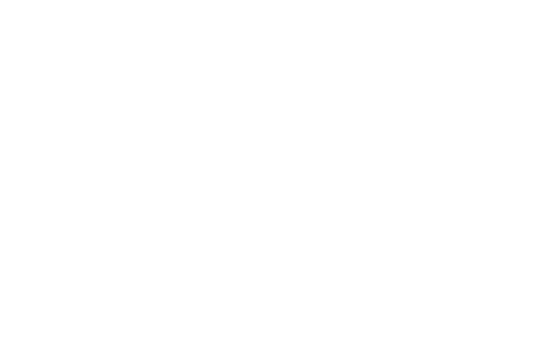

<IPython.core.display.Javascript object>


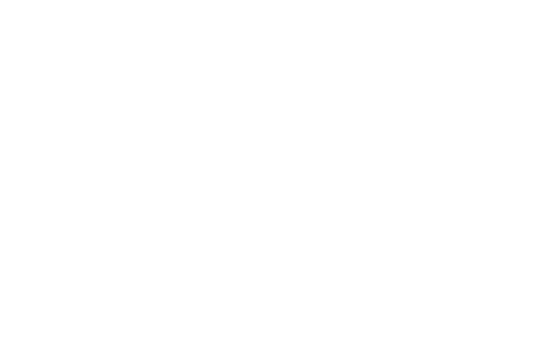

In [372]:
from matplotlib import pyplot as plt
import numpy as np

#Function to calculate partial derivative of cost for m
def costMgradient(data, m):
    grad = 0
    #Loop through all 50 movie records
    for index, movie in data.iterrows():
        #Find difference between actual and estimate
        x = movie['num_explosions']
        y = movie['james_movie_rating']
        grad += (y - (m*x + 4))*(-x)
    grad = grad * 2 / (len(data))
    return grad
        
    
#Defines graph, starting point, and learning rate
alpha = .03
m = -3
mrange = np.arange(-10,11)       

fig, ax = plt.subplots()
line = ax.plot(mrange,cost(data, mrange,4))
mark, = ax.plot(m,cost(data,m,4),'*',markersize=20)

def init():
    ax.axis([-5, 5, 0, 1000])
    ax.set_xlabel('m')
    ax.set_ylabel('Cost' )
    ax.set_title('Cost at b = 4, Training Rate = .03')
    
def animate(i):
    oldm = mark.get_xdata() 
    newm = oldm - (alpha * costMgradient(data, oldm))
    
    mark.set_xdata(newm)
    mark.set_ydata(cost(data,newm,4))
    return mark


#ani = animation.FuncAnimation(fig, animate, frames=15 ,init_func=init, interval=1250)

file = './cost_train_03'
plt.rcParams['animation.ffmpeg_path'] = 'path/to/ffmpeg.exe'
#ani.save(file+'.mp4',writer='ffmpeg') #<-- commented out so we don't overwrite the mp4 everytime this notebook runs

In [355]:
%%HTML
<video width="800" height="450" controls>
  <source src="./cost_train_03.mp4" type="video/mp4">
</video>

At this training level of .03, you can see that each time we overshoot the global minimum.  While it does still converge on the minimum, it takes a lot of extra steps almost have it is circling the drain.  Its a good training rate value, but not a great one.

Now let's see what happen when the learning rate is even higher.  Let us set alpha to .04 and reset the graph (we'll also expand the axis range...foreshadowing)

<IPython.core.display.Javascript object>


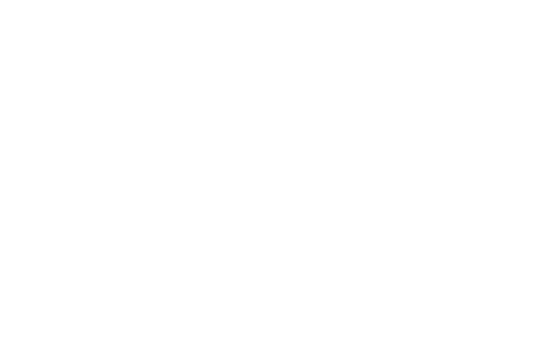

<IPython.core.display.Javascript object>


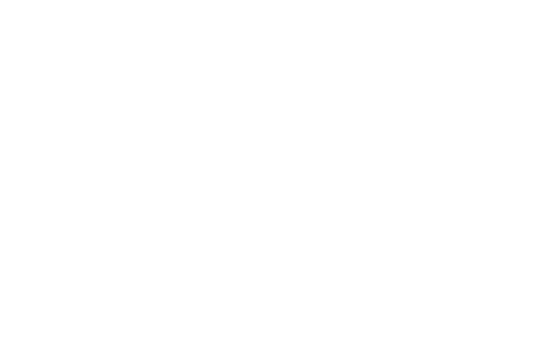

In [363]:
#Defines graph, starting point, and learning rate
alpha = .04
m = -3
mrange = np.arange(-100,100)       

fig, ax = plt.subplots()
line = ax.plot(mrange,cost(data, mrange,4))
mark, = ax.plot(m,cost(data,m,4),'*',markersize=20)

def init():
    ax.axis([-100, 100, 0, 100000])
    ax.set_xlabel('m')
    ax.set_ylabel('Cost' )
    ax.set_title('Cost at b = 4, Training Rate = .04')
    
#ani = animation.FuncAnimation(fig, animate, frames=15 ,init_func=init, interval=1250)

file = './cost_train_04'
plt.rcParams['animation.ffmpeg_path'] = 'path/to/ffmpeg.exe'
#ani.save(file+'.mp4',writer='ffmpeg') #<-- commented out so we don't overwrite the mp4 everytime this notebook runs

In [357]:
%%HTML
<video width="800" height="450" controls>
  <source src="./cost_train_04.mp4" type="video/mp4">
</video>

At this training rate of .04, the point won't converge at all.  It will continue to actually ASCEND the cost function rather than descending.  It behaves like a rocket skateboard in a half pipe, climbing and climbing.  Suffice it to say, this is not a path towards the best m and b values.  

To summarize so far, when the training rate is a little bit too high, the point will oscillate around the minimum and will eventually converge but it will take many extra steps.  When it is significantly too high, the point becomes in danger of not converging at all.

Now lets explore the other side: when the training rate is too small. I will set the training rate alpha to .001

<IPython.core.display.Javascript object>


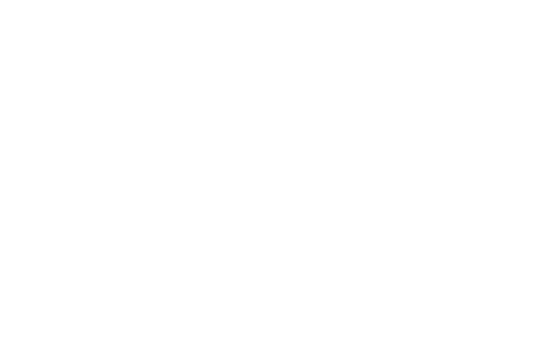

<IPython.core.display.Javascript object>


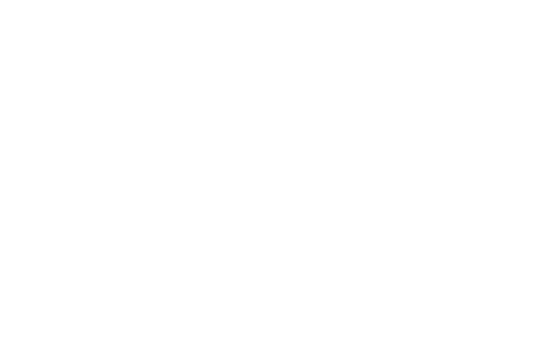

Traceback (most recent call last):
  File "c:\python3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "c:\python3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [373]:
#Defines graph, starting point, and learning rate
alpha = .001
m = -3
mrange = np.arange(-100,100)       

fig, ax = plt.subplots()
line = ax.plot(mrange,cost(data, mrange,4))
mark, = ax.plot(m,cost(data,m,4),'*',markersize=20)

def init():
    ax.axis([-3, 3, 0, 400])
    ax.set_xlabel('m')
    ax.set_ylabel('Cost' )
    ax.set_title('Cost at b = 4, Training Rate = .001')
    
#ani = animation.FuncAnimation(fig, animate, frames=15 ,init_func=init, interval=1250)

file = './cost_train_01'
plt.rcParams['animation.ffmpeg_path'] = 'path/to/ffmpeg.exe'
#ani.save(file+'.mp4',writer='ffmpeg') #<-- commented out so we don't overwrite the mp4 everytime this notebook runs

In [374]:
%%HTML
<video width="800" height="450" controls>
  <source src="./cost_train_01.mp4" type="video/mp4">
</video>

Sort of like watching paint dry isn't it?  Much like the slightly too high training rate, a too low training rate will eventually converge but the problem is that it take a long time to get there.  Ideally, we find the goldilocks training rate value where it finds the global minimum relatively quickly, but the lurch towards the global minimum isn't so large that the point overshoots the minimum and risks non-convergence.

With all that said, let's try .009

<IPython.core.display.Javascript object>


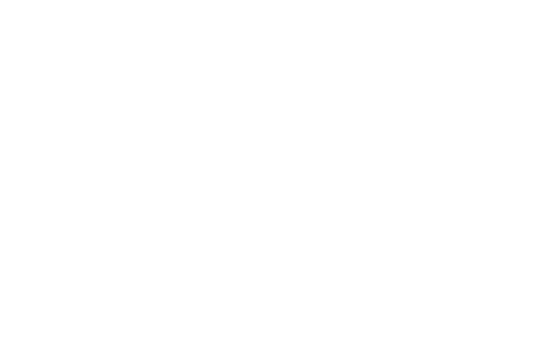

<IPython.core.display.Javascript object>


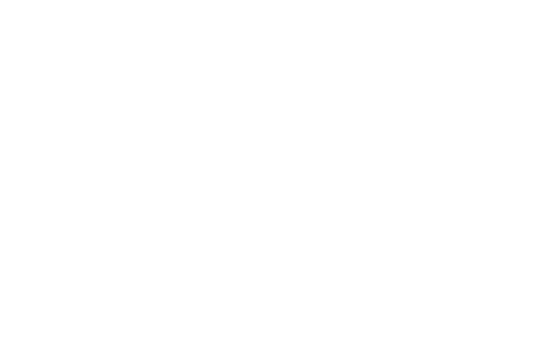

Traceback (most recent call last):
  File "c:\python3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "c:\python3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [375]:
#Defines graph, starting point, and learning rate
alpha = .009
m = -3
mrange = np.arange(-100,100)       

fig, ax = plt.subplots()
line = ax.plot(mrange,cost(data, mrange,4))
mark, = ax.plot(m,cost(data,m,4),'*',markersize=20)

def init():
    ax.axis([-3, 3, 0, 400])
    ax.set_xlabel('m')
    ax.set_ylabel('Cost' )
    ax.set_title('Cost at b = 4, Training Rate = .009')
    
#ani = animation.FuncAnimation(fig, animate, frames=15 ,init_func=init, interval=1250)

file = './cost_train_02'
plt.rcParams['animation.ffmpeg_path'] = 'path/to/ffmpeg.exe'
#ani.save(file+'.mp4',writer='ffmpeg') #<-- commented out so we don't overwrite the mp4 everytime this notebook runs

In [376]:
%%HTML
<video width="800" height="450" controls>
  <source src="./cost_train_02.mp4" type="video/mp4">
</video>

That looks like a pretty good training rate level.  It isn't important that we get the optimal training rate value alpha before we run the model, but we should know the consequences of choosing a training rate too large or too small.

Let us now return to our full 3D cost function.  The procedure will be nearly the same, except now we find not just new values for m during each iteration, but new values for b as well.